# Smoke Detection Project 

###### Prepared by Edidiong Udoh

A smoke detector is basically a device which detects smoke and raises an alarm to alert others. They are mostly used in offices, home, factories, etc.


The objective of this project is to make an AI model using the given dataset to accurately raise an alarm if smoke is detected.

* Data Understanding - The data provided is in a csv file format, containing various physicochemical properties of fire. Exploratory analysis will be carried out in the notebook before modelling. 
* Data Preparation - There are no null values in the dataset
* Modelling - 5 models will be evaluated for this classification task: logistic regression, random forest, k-nearest neighbors, support vector machine and decision tree. Training and test data will split be 70:30.
* Evaluation - Each of the 5 models will be compared and evaluated using Cross validation, precision and recall.
* Deployment - This was not within the scope of this exercise

In [1]:
# Import libraries for Data Manipulation

import numpy as np
import pandas as pd

# Import libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


## Data Inspection

In [2]:
# Load the dataset
sd = pd.read_csv(r'C:\Users\user\Documents\DATA ANALYSIS FILES\10ALYTICS\Excel-CSV\smoke_detection_iot.csv')

# view the top 5
sd.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [3]:
# view the bottom 5
sd.tail()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


The features in the dataset and meaning:

* UTC - The time when experiment was performed.
* Temperature - Temperature of Surroundings. Measured in Celsius
* Humidity - The air humidity during the experiment.
* TVOC - Total Volatile Organic Compounds. Measured in ppb (parts per billion)
* eCo2 - CO2 equivalent concentration. Measured in ppm (parts per million)
* Raw H2 - The amount of Raw Hydrogen present in the surroundings.
* Raw Ethanol - The amount of Raw Ethanol present in the surroundings.
* Pressure - Air pressure. Measured in hPa
* PM1.0 - Paticulate matter of diameter less than 1.0 micrometer .
* PM2.5 - Paticulate matter of diameter less than 2.5 micrometer.
* NC0.5 - Concentration of particulate matter of diameter less than 0.5 micrometers.
* NC1.0 - Concentration of particulate matter of diameter less than 1.0 micrometers.
* NC2.5 - Concentration of particulate matter of diameter less than 2.5 micrometers.
* CNT - Simple Count.
* Fire Alarm - (Reality) If fire was present then value is 1 else it is 0.


##### Data Cleaning 

'''It is adviced to make a copy of the dataset before any change is made to the dataset'''
 '''for easy reference to the original dataset'''

In [4]:
sd1 = sd.copy()
sd1.head(2)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0


In [5]:
# Removing of redundant column - the first column is an explicit indexing which is not needed since panda has provided an inplicit indexing

sd1.drop('Unnamed: 0', axis=1, inplace=True)
sd1.head(2)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0


In [6]:
# Convert UTC column from interger to datetime: UTC is Time

sd1['UTC'] = pd.to_datetime(sd['UTC'], unit='ms')

sd1.head(2)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1970-01-20 03:38:53.331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1970-01-20 03:38:53.332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0


In [7]:
# Rename Column names

sd1.columns = ['UTC', 'Temperature_C', 'Humidity', 'TVOC_ppb', 'eCO2_ppm',
       'Raw_H2', 'Raw_Ethanol', 'Pressure_hPa', 'PM1', 'PM2_5', 'NC0_5',
       'NC1_0', 'NC2_5', 'CNT', 'Fire_Alarm']

sd1.head(2)

,UTC,Temperature_C,Humidity,TVOC_ppb,eCO2_ppm,Raw_H2,Raw_Ethanol,Pressure_hPa,PM1,PM2_5,NC0_5,NC1_0,NC2_5,CNT,Fire_Alarm
0,1970-01-20 03:38:53.331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1970-01-20 03:38:53.332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0


###### Inspection

In [8]:
# Dimensionality of the data

sd1.shape

(62630, 15)

In [9]:
# Statistical information of the data set

sd1.describe().astype(int)

,Temperature_C,Humidity,TVOC_ppb,eCO2_ppm,Raw_H2,Raw_Ethanol,Pressure_hPa,PM1,PM2_5,NC0_5,NC1_0,NC2_5,CNT,Fire_Alarm
count,62630,62630,62630,62630,62630,62630,62630,62630,62630,62630,62630,62630,62630,62630
mean,15,48,1942,670,12942,19754,938,100,184,491,203,80,10511,0
std,14,8,7811,1905,272,609,1,922,1976,4265,2214,1083,7597,0
min,-22,10,0,400,10668,15317,930,0,0,0,0,0,0,0
25%,10,47,130,400,12830,19435,938,1,1,8,1,0,3625,0
50%,20,50,981,400,12924,19501,938,1,1,12,1,0,9336,1
75%,25,53,1189,438,13109,20078,939,2,2,14,2,0,17164,1
max,59,75,60000,60000,13803,21410,939,14333,45432,61482,51914,30026,24993,1


In [10]:
# overview of the dataset - data verification

sd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UTC            62630 non-null  datetime64[ns]
 1   Temperature_C  62630 non-null  float64       
 2   Humidity       62630 non-null  float64       
 3   TVOC_ppb       62630 non-null  int64         
 4   eCO2_ppm       62630 non-null  int64         
 5   Raw_H2         62630 non-null  int64         
 6   Raw_Ethanol    62630 non-null  int64         
 7   Pressure_hPa   62630 non-null  float64       
 8   PM1            62630 non-null  float64       
 9   PM2_5          62630 non-null  float64       
 10  NC0_5          62630 non-null  float64       
 11  NC1_0          62630 non-null  float64       
 12  NC2_5          62630 non-null  float64       
 13  CNT            62630 non-null  int64         
 14  Fire_Alarm     62630 non-null  int64         
dtypes: datetime64[ns](1

In [11]:
# Checking for null/missing values

sd1.isna().sum()

UTC              0
Temperature_C    0
Humidity         0
TVOC_ppb         0
eCO2_ppm         0
Raw_H2           0
Raw_Ethanol      0
Pressure_hPa     0
PM1              0
PM2_5            0
NC0_5            0
NC1_0            0
NC2_5            0
CNT              0
Fire_Alarm       0
dtype: int64

## Exploratory Analysis (EDA)

#### Univariate Analysis

Text(0.5, 1.0, 'Temperature[C]')

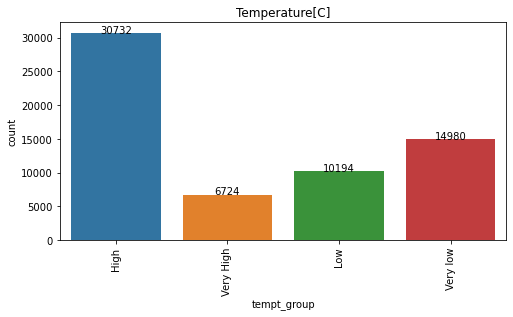

In [12]:
# Temperature

# create a function that categorises Temperature
def tempt_bracket (Temperature_C):
    if Temperature_C <=9:
        return "Very low"
    elif Temperature_C <=18:
        return "Low"
    elif Temperature_C <=27:
        return "High"
    else: 
        return "Very High"

    
# Create a new column for age category
sd1["tempt_group"] = sd1["Temperature_C"].apply(tempt_bracket)


#Create visualization
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "tempt_group", data = sd1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Temperature[C]')

Temperature between 17 to 27 degree are more on the dataset 

Text(0.5, 1.0, 'Humidity')

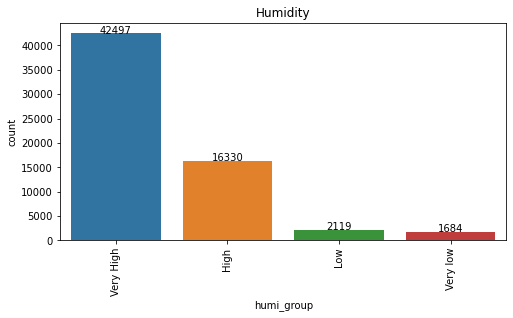

In [13]:
# Humidity

# create a function that categorises Humidity
def humi_bracket (Humidity):
    if Humidity <=16:
        return "Very low"
    elif Humidity <=32:
        return "Low"
    elif Humidity <=48:
        return "High"
    else: 
        return "Very High"

    
# Create a new column for age category
sd1["humi_group"] = sd1["Humidity"].apply(humi_bracket)


#Create visualization
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "humi_group", data = sd1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Humidity')

Humidity Percentage greater than 48 is more in the dataset, compared to others

Text(0.5, 1.0, 'TVOC_ppb')

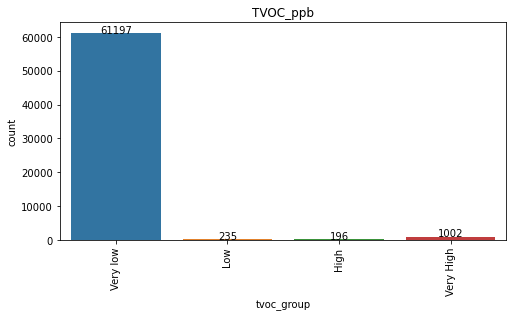

In [14]:
# TVOC

# create a function that categorises TVOC
def tvoc_bracket (TVOC_ppb):
    if TVOC_ppb <=15000:
        return "Very low"
    elif TVOC_ppb <=30000:
        return "Low"
    elif TVOC_ppb <=45000:
        return "High"
    else: 
        return "Very High"

    
# Create a new column for age category
sd1["tvoc_group"] = sd1["TVOC_ppb"].apply(tvoc_bracket)


#Create visualization
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "tvoc_group", data = sd1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('TVOC_ppb')

Total Volatile Organic Compounds (TVOC) less than/ equal to 15000ppb are more in the dataset.

Text(0.5, 1.0, 'eCO2_ppm')

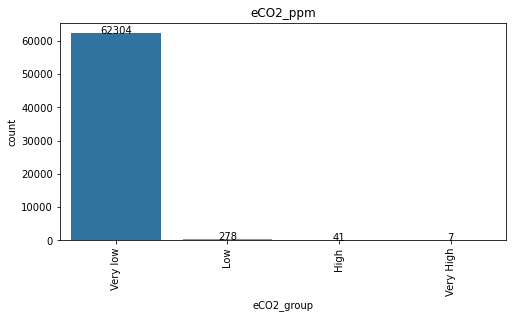

In [15]:
# eCO2_ppm

# create a function that categorises TVOC
def eCO2_bracket (eCO2_ppm):
    if eCO2_ppm <=15000:
        return "Very low"
    elif eCO2_ppm <=30000:
        return "Low"
    elif eCO2_ppm <=45000:
        return "High"
    else: 
        return "Very High"

    
# Create a new column for age category
sd1["eCO2_group"] = sd1["eCO2_ppm"].apply(eCO2_bracket)


#Create visualization
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "eCO2_group", data = sd1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('eCO2_ppm')

CO2 equivalent concentration (eCO2) less than/ equal to 15000ppm are more in the dataset

Text(0.5, 1.0, 'Raw_H2')

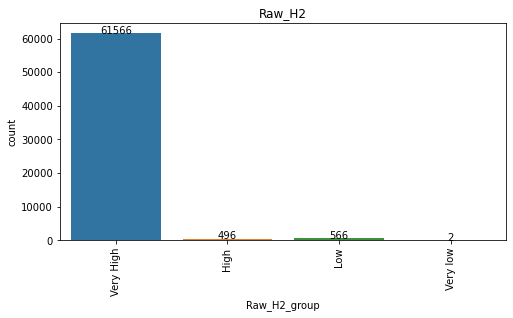

In [16]:
# Raw H2

# create a function that categorises Raw H2
def Raw_H2_bracket (Raw_H2):
    if Raw_H2 <= 10668:
        return "Very low"
    elif Raw_H2 <=11468:
        return "Low"
    elif Raw_H2 <=12268:
        return "High"
    else: 
        return "Very High"

    
# Create a new column for age category
sd1["Raw_H2_group"] = sd1["Raw_H2"].apply(Raw_H2_bracket)


#Create visualization
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "Raw_H2_group", data = sd1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Raw_H2')

 Raw Hydrogen level greater than 12268 is more in the dataset.

Text(0.5, 1.0, 'Raw_Ethanol')

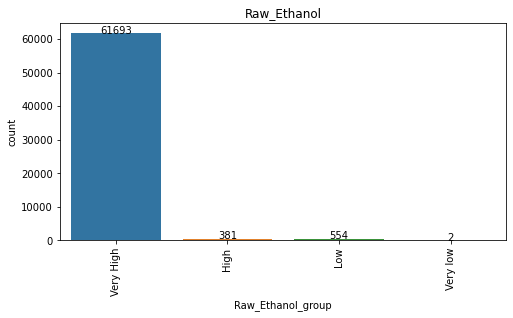

In [17]:
# Raw_Ethanol 

# create a function that categorises Raw_Ethanol 
def Raw_Ethanol_bracket (Raw_Ethanol):
    if Raw_Ethanol <= 15317:
        return "Very low"
    elif Raw_Ethanol <=16817:
        return "Low"
    elif Raw_Ethanol <=18317:
        return "High"
    else: 
        return "Very High"

    
# Create a new column for age category
sd1["Raw_Ethanol_group"] = sd1["Raw_Ethanol"].apply(Raw_Ethanol_bracket)


#Create visualization
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "Raw_Ethanol_group", data = sd1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Raw_Ethanol')

Raw Ethanol greater than 18317 is most in the dataset

Text(0.5, 1.0, 'Pressure_hPa')

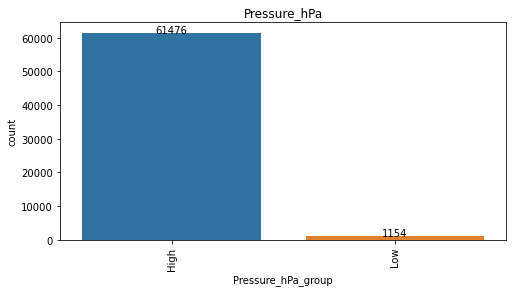

In [18]:
#Pressure_hPa

# create a function that categorises Pressure_hPa
def Pressure_hPa_bracket (Pressure_hPa):
    if Pressure_hPa <= 935:
        return "Low"
    
    else: 
        return "High"

    
# Create a new column for age category
sd1["Pressure_hPa_group"] = sd1["Pressure_hPa"].apply(Pressure_hPa_bracket)


#Create visualization
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "Pressure_hPa_group", data = sd1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Pressure_hPa')

Pressure measurement greater than 935 are most in the dataset

Text(0.5, 1.0, 'PM1')

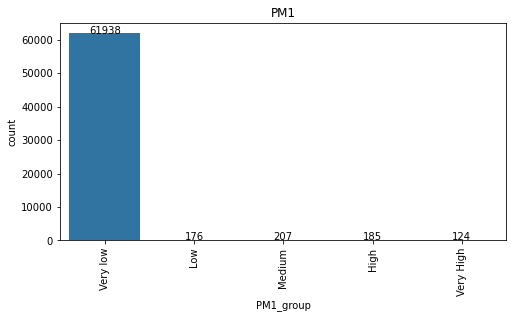

In [19]:
#PM1.0

# create a function that categorises PM1.0
def PM1_bracket (PM1):
    if PM1 <= 2867:
        return "Very low"
    elif PM1 <=5734:
        return "Low"
    elif PM1 <= 8601:
        return "Medium"
    elif PM1 <=11468:
        return "High"
    else: 
        return "Very High"

    
# Create a new column for age category
sd1["PM1_group"] = sd1["PM1"].apply(PM1_bracket)


#Create visualization
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "PM1_group", data = sd1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('PM1')

PM1.0 measurement less than 2867 (very low) had the highest distributions in the dataset 

Text(0.5, 1.0, 'PM2.5')

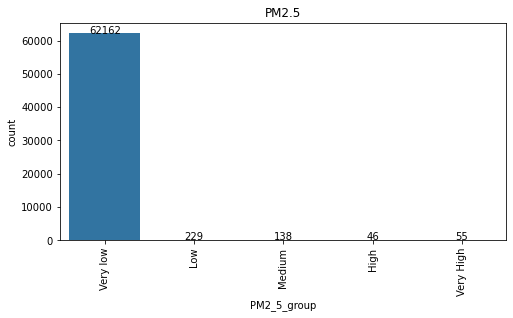

In [20]:
#PM2.5

# create a function that categorises PM2.5
def PM2_5_bracket (PM2_5):
    if PM2_5 <= 9086:
        return "Very low"
    elif PM2_5 <=18172:
        return "Low"
    elif PM2_5 <= 27258:
        return "Medium"
    elif PM2_5 <=36344:
        return "High"
    else: 
        return "Very High"

    
# Create a new column for age category
sd1["PM2_5_group"] = sd1["PM2_5"].apply(PM2_5_bracket)


#Create visualization
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "PM2_5_group", data = sd1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('PM2.5')

PM2.5 measurement less than 9086 (very low) had the highest distributions in the dataset 

Text(0.5, 1.0, 'NC0.5')

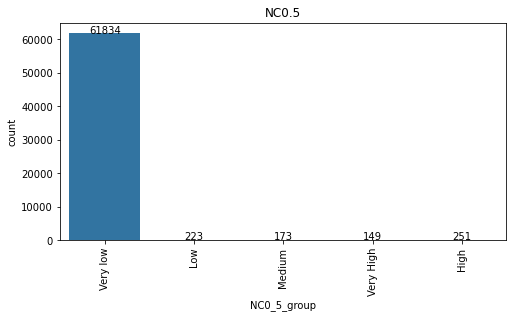

In [21]:
#NC0.5

# create a function that categorises NC0.5
def NC0_5_bracket (NC0_5):
    if NC0_5 <= 12296:
        return "Very low"
    elif NC0_5 <=24592:
        return "Low"
    elif NC0_5 <= 36888:
        return "Medium"
    elif NC0_5 <=49184:
        return "High"
    else: 
        return "Very High"

    
# Create a new column for age category
sd1["NC0_5_group"] = sd1["NC0_5"].apply(NC0_5_bracket)


#Create visualization
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "NC0_5_group", data = sd1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('NC0.5')

NC0.5 measurement less than 12296 (very low) had the highest distribution in the dataset 

Text(0.5, 1.0, 'NC1.0')

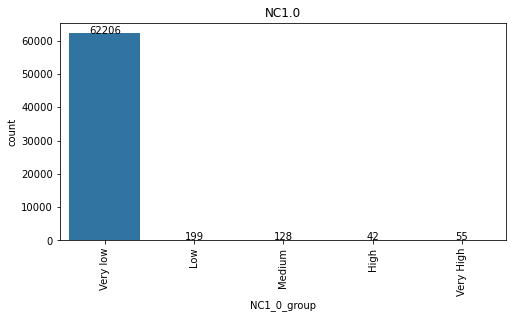

In [22]:
#NC1.0

# create a function that categorises NC1.0
def NC1_0_bracket (NC1_0):
    if NC1_0 <= 10382:
        return "Very low"
    elif NC1_0 <=20764:
        return "Low"
    elif NC1_0 <= 31146:
        return "Medium"
    elif NC1_0 <=41528:
        return "High"
    else: 
        return "Very High"

    
# Create a new column for age category
sd1["NC1_0_group"] = sd1["NC1_0"].apply(NC1_0_bracket)


#Create visualization
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "NC1_0_group", data = sd1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('NC1.0')

NC1.0 measurement less than 10382 (very low) had the highest distribution in the dataset 

Text(0.5, 1.0, 'NC2.5')

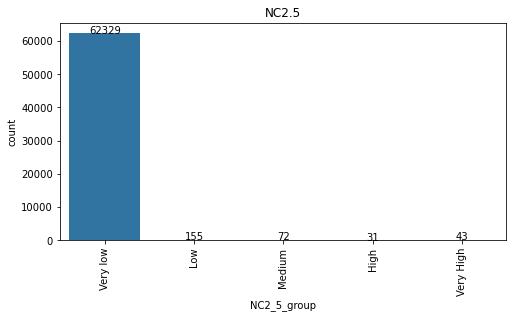

In [23]:
#NC2.5

# create a function that categorises PM2.5
def NC2_5_bracket (NC2_5):
    if NC2_5 <= 6005:
        return "Very low"
    elif NC2_5 <=12010:
        return "Low"
    elif NC2_5 <= 18015:
        return "Medium"
    elif NC2_5 <=24020:
        return "High"
    else: 
        return "Very High"

    
# Create a new column for age category
sd1["NC2_5_group"] = sd1["NC2_5"].apply(NC2_5_bracket)


#Create visualization
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "NC2_5_group", data = sd1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('NC2.5')

NC2.5 measurement less than 6005 (very low) had the highest distribution in the dataset 

Text(0.5, 1.0, 'CNT')

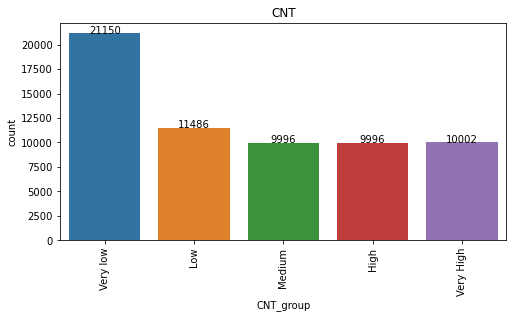

In [24]:
#CNT

# create a function that categorises PM2.5
def CNT_bracket (CNT):
    if CNT <= 4998:
        return "Very low"
    elif CNT <=9996:
        return "Low"
    elif CNT <= 14994:
        return "Medium"
    elif CNT <=19992:
        return "High"
    else: 
        return "Very High"

    
# Create a new column for age category
sd1["CNT_group"] = sd1["CNT"].apply(CNT_bracket)


#Create visualization
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "CNT_group", data = sd1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('CNT')

CNT measurement less than 4998 (very low) had the highest distribution in the dataset 

<AxesSubplot:title={'center':'Fire Alarm'}, ylabel='Fire_Pres'>

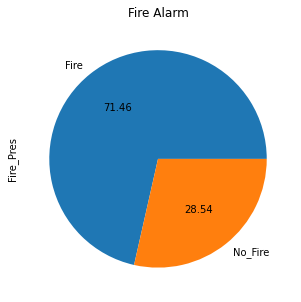

In [25]:
# Fire Alarm (1 = Fire Presence, 0 = No Fire)

# Create Function that categorise Fraud
def FireP(Fire_Alarm):
    if Fire_Alarm == 1:
        return 'Fire'
    else:
        return 'No_Fire'
    
sd1['Fire_Pres'] = sd1['Fire_Alarm'].apply(FireP)

#Create visualization for Fire Alarm using Fire Pres Column
plt.figure(figsize = (10,5))
plt.title('Fire Alarm')
sd1['Fire_Pres'].value_counts(normalize=True).plot.pie(autopct="%.2f")

There are more of Fire Presence (about 71%), than No Fire presence in the dataset

#### Bivariate Analysis

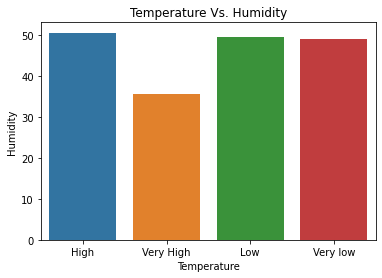

In [26]:
sns.barplot(x="tempt_group", y="Humidity", data=sd1, ci=None)
plt.title("Temperature Vs. Humidity")
plt.xlabel("Temperature")
plt.ylabel("Humidity")

plt.show()

High temperature measurements had the highest Humidity Measurement. 

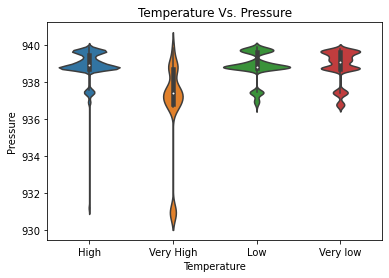

In [27]:
sns.violinplot(x="tempt_group", y="Pressure_hPa", data=sd1)
plt.title("Temperature Vs. Pressure")
plt.xlabel("Temperature")
plt.ylabel("Pressure")

plt.show()

Though there are lots of outliers on the "Very High" Temperature measurement, It had the highest Pressure Measurement.

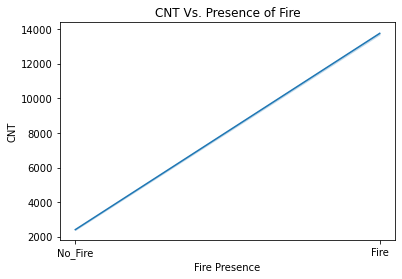

In [28]:
sns.lineplot(x="Fire_Pres", y="CNT", data=sd1)
plt.title("CNT Vs. Presence of Fire")
plt.xlabel("Fire Presence")
plt.ylabel("CNT")

plt.show()

There is a Positive Correlation between Fire Presence (Fire Alarm) and CNT. Meaning increase in CNT amount indicated occurence of Fire.

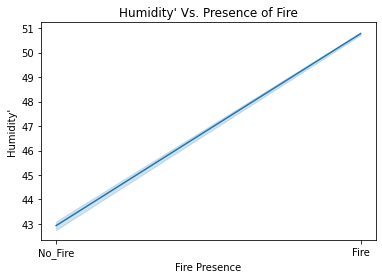

In [29]:
sns.lineplot(x="Fire_Pres", y="Humidity", data=sd1)
plt.title("Humidity' Vs. Presence of Fire")
plt.xlabel("Fire Presence")
plt.ylabel("Humidity'")

plt.show()

There is a Positive Correlation between Fire Presence (Fire Alarm) and Humidity. Meaning increase in Humidity amount indicated occurence of Fire.

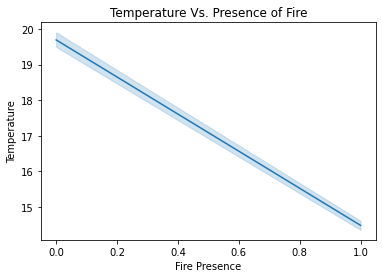

In [66]:
sns.lineplot(x="Fire_Alarm", y="Temperature_C", data=sd1)
plt.title("Temperature Vs. Presence of Fire")
plt.xlabel("Fire Presence")
plt.ylabel("Temperature")

plt.show()

Recall: 1.0(Fire Presence), and 0.0 (No fire). In the chart above, It shows that there is a negative correlation between temperature and Fire_Alarm. 

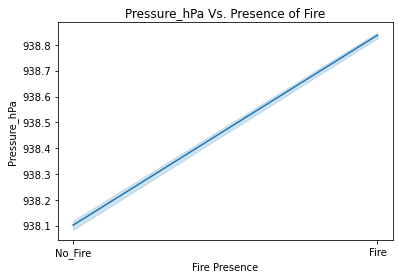

In [30]:
sns.lineplot(x="Fire_Pres", y="Pressure_hPa", data=sd1)
plt.title("Pressure_hPa Vs. Presence of Fire")
plt.xlabel("Fire Presence")
plt.ylabel("Pressure_hPa")

plt.show()

There is a Positive Correlation between Fire Presence (Fire Alarm) and Pressure. Meaning increase in Pressure amount indicated occurence of Fire.

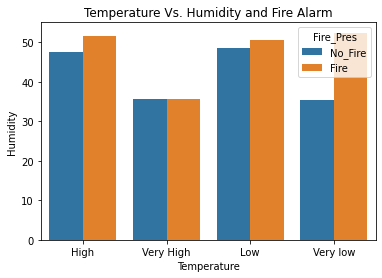

In [31]:
sns.barplot(x="tempt_group", y="Humidity", hue="Fire_Pres", data=sd1, ci=None)
plt.title("Temperature Vs. Humidity and Fire Alarm")
plt.xlabel("Temperature")
plt.ylabel("Humidity")

plt.show()

High Humidity measurement indicated the presence of Fire, irrespective of the measurement of the temperature, though highest Temperature measurement, indicated highest humidity measurement and fire presence.

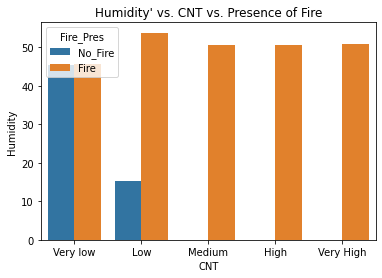

In [32]:
sns.barplot(x="CNT_group", y="Humidity", hue="Fire_Pres" , data=sd1, ci=None)
plt.title("Humidity' vs. CNT vs. Presence of Fire")
plt.xlabel("CNT")
plt.ylabel("Humidity")

plt.show()

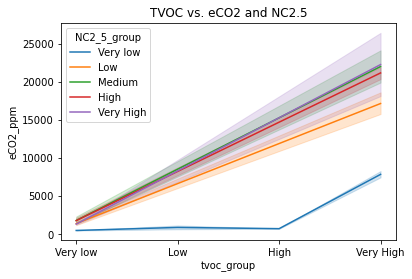

In [33]:
sns.lineplot(x="tvoc_group", y="eCO2_ppm", hue="NC2_5_group", data=sd1)
plt.title("TVOC vs. eCO2 and NC2.5")
plt.xlabel("tvoc_group")
plt.ylabel("eCO2_ppm")

plt.show()

There was a positive correlation between TVOC, eCO2 and NC2.5 measurements

Text(0.5, 1.0, 'Correlations between Columns')

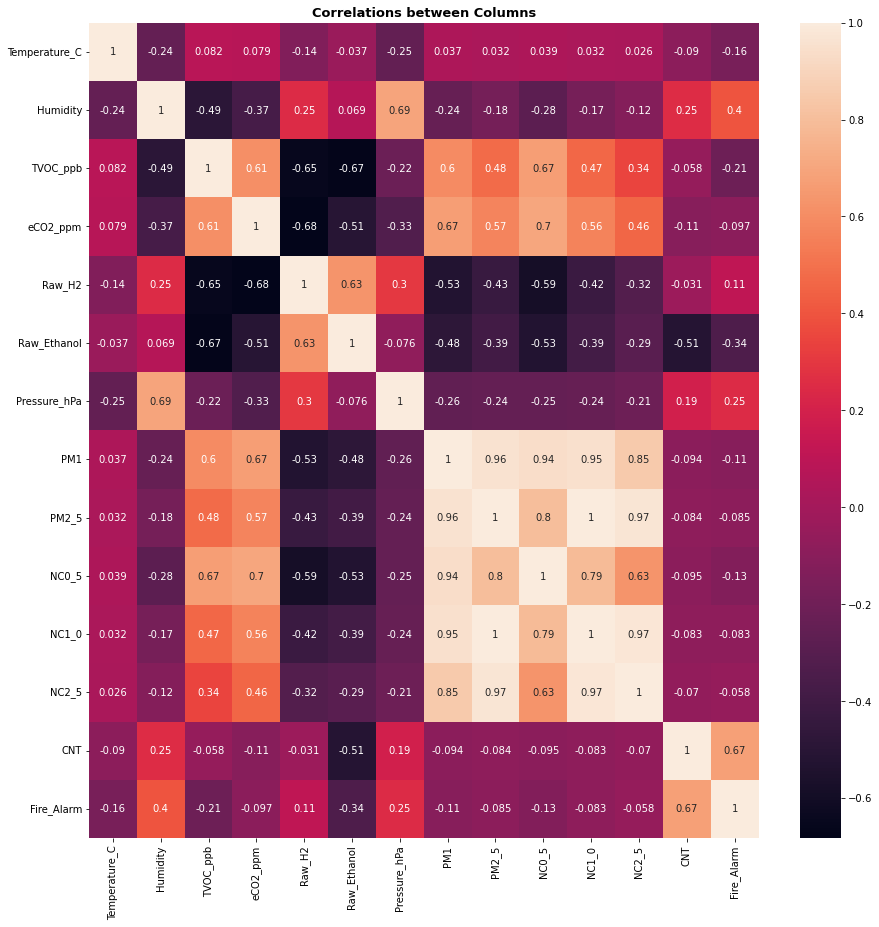

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(sd1.corr(),annot=True)
plt.title('Correlations between Columns', fontsize=13,weight=("bold"))

There was a:
* Weak correlation between Humidity and Fire alarm, Strong correlation betwen CNT and Fire Alarm
* Strong correlation between NC2.5 and PM1,PM2.5,NC0.5,NC1.0
* Strong correlation between TVOC and eCO2, and NC2.5, PM1,PM2.5,NC0.5,NC1.0
* Strong correlation between humdity and pressure

### Summary of Findings

There positive correlations between some chemical components in a fire indicated a presence of fire in the dataset, component like Humdity, CNT and Pressure. Meaning, the higher the measurement of these components in the environmnet, the higher the chances of fire presence.


## Modelling

In [36]:
# drop categorical data columns that were created for visualization purpose

sd1.drop(['tempt_group', 'humi_group', 'tvoc_group',
       'eCO2_group', 'Raw_H2_group', 'Raw_Ethanol_group', 'Pressure_hPa_group',
       'PM1_group', 'PM2_5_group', 'NC0_5_group', 'NC1_0_group', 'NC2_5_group',
       'CNT_group', 'Fire_Pres'], axis = 1, inplace = True)

sd1.head(2)

,UTC,Temperature_C,Humidity,TVOC_ppb,eCO2_ppm,Raw_H2,Raw_Ethanol,Pressure_hPa,PM1,PM2_5,NC0_5,NC1_0,NC2_5,CNT,Fire_Alarm
0,1970-01-20 03:38:53.331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1970-01-20 03:38:53.332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0


### Feature Selection  - Choose Target

In [37]:
y = sd1["Fire_Alarm"]
X = sd1.drop(["Fire_Alarm",'UTC'], axis=1)

In [38]:
y.head()


0    0
1    0
2    0
3    0
4    0
Name: Fire_Alarm, dtype: int64

In [39]:
X.head()

,Temperature_C,Humidity,TVOC_ppb,eCO2_ppm,Raw_H2,Raw_Ethanol,Pressure_hPa,PM1,PM2_5,NC0_5,NC1_0,NC2_5,CNT
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4


### Preparing the models
#### Train Test Split

In [41]:
#Import train_test_split
from sklearn.model_selection import train_test_split
#split into training and validation sets using a 30% split ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

## Import ML algorithms and initialize them

In [42]:
# Importation of necessary libraries

# Machine Learning
from sklearn.model_selection import cross_val_score, cross_val_predict

#ML Algorithms
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#ML Metrics
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix


In [43]:
# initialization of Algorithms

In [44]:
#Create a svm Classifier (intialize)
clf = svm.SVC(kernel='linear') # Linear Kernel

In [45]:
# Initialize algorithms KNeighborsClassifier

KN = KNeighborsClassifier()

In [46]:
# Initialize algorithms LogisticRegression
LR = LogisticRegression()

In [47]:
RF = RandomForestClassifier()

In [48]:
DT = DecisionTreeClassifier()

In [49]:
classifiers = [clf,KN,LR,RF,DT]

## Train and Test the models

In [50]:
# Confusion matrix function

def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_,
    cmap='coolwarm',
    linecolor='white',
    linewidths=1,
    annot=True,
    fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [51]:
# Create a function to train and evaluate model
def trainer(model,X_train,y_train,X_test,y_test):
    #fit the model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    # print evaluation metrics
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(prediction,y_test)) 
    plot_confusion_matrix(y_test,prediction)


For SVC, Accuracy score is 0.9957954122092714 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5410
           1       1.00      1.00      1.00     13379

    accuracy                           1.00     18789
   macro avg       1.00      0.99      0.99     18789
weighted avg       1.00      1.00      1.00     18789



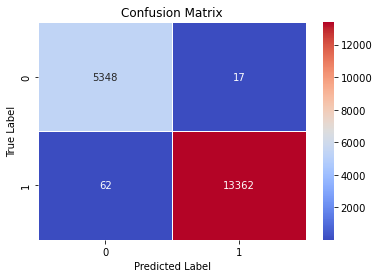


For KNeighborsClassifier, Accuracy score is 0.9998403321092129 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5362
           1       1.00      1.00      1.00     13427

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



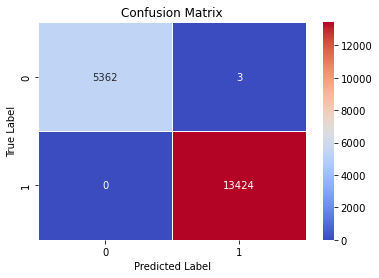


For LogisticRegression, Accuracy score is 0.9879716855607004 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      5575
           1       0.98      1.00      0.99     13214

    accuracy                           0.99     18789
   macro avg       0.99      0.98      0.99     18789
weighted avg       0.99      0.99      0.99     18789



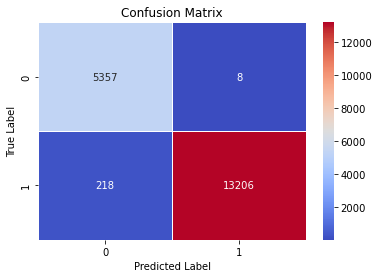


For RandomForestClassifier, Accuracy score is 0.9999467773697376 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5366
           1       1.00      1.00      1.00     13423

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



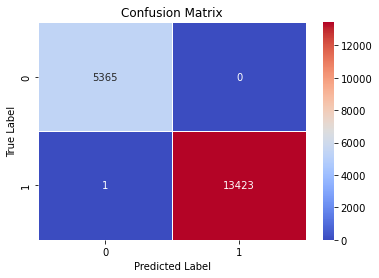


For DecisionTreeClassifier, Accuracy score is 0.9998403321092129 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5364
           1       1.00      1.00      1.00     13425

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



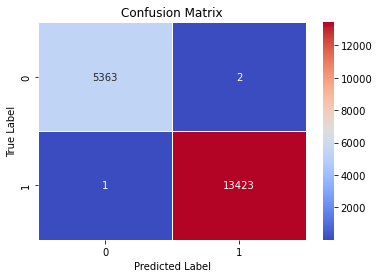

In [52]:
# loop through all models
for model in classifiers:
    trainer(model,X_train,y_train,X_test,y_test)

### Inspect Feature Importances

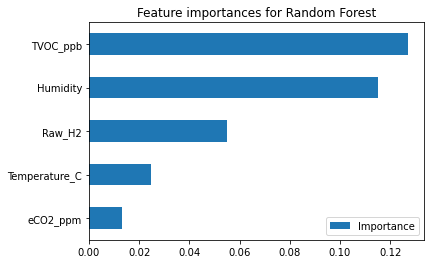

In [53]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_test.columns, columns=['Importance'])

#plot top 5 feature importances, sorted
RF_importances[:5].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for Random Forest')
plt.show()

In [54]:
#get these top 5 importances
RF_importances[:5].sort_values(by='Importance').index.values

array(['eCO2_ppm', 'Temperature_C', 'Raw_H2', 'Humidity', 'TVOC_ppb'],
      dtype=object)

### A Bit of Feature Selection

In [55]:
#create a new X train with only 5 features
X_train2 = X_train[['eCO2_ppm', 'Temperature_C', 'Raw_H2', 'Humidity', 'TVOC_ppb']]

X_train2.head(2)

,eCO2_ppm,Temperature_C,Raw_H2,Humidity,TVOC_ppb
62171,1102,-21.871,12449,12.09,60000
15048,448,13.044,12870,52.91,1134


In [56]:
X_test2 = X_test[['eCO2_ppm', 'Temperature_C', 'Raw_H2', 'Humidity', 'TVOC_ppb']]

In [57]:
#train and predict
RF.fit(X_train2,y_train)
prediction2 = RF.predict(X_test2)

print(accuracy_score(prediction2,y_test))

0.9996806642184257


### Evaluating with Cross Validation

In cross validation, the model splits the training data into multiple blocks. Using 1 block as test set for each training iteration, it trains the other blocks and validates against the test data.

It helps to compare and select an appropriate model for the specific predictive modeling problem.

In [58]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=2, shuffle=True)

In [59]:
#create function to train a model with cross validations and evaluate precision
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
    # report performance
    print('\nFor {}, Precision is {} \n'.format(model.__class__.__name__,mean(scores)))

In [60]:
#train and predict, looping through the list of models
for model in classifiers:
    trainer_with_cv(model,X_train,y_train)


For SVC, Precision is 0.9985902659223747 


For KNeighborsClassifier, Precision is 0.999617510446108 


For LogisticRegression, Precision is 0.9954852108693537 


For RandomForestClassifier, Precision is 1.0 


For DecisionTreeClassifier, Precision is 1.0 



In [61]:
#create function to train a model with cross validations and evaluate recall
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    # report performance
    print('\nFor {}, Recall is {} \n'.format(model.__class__.__name__,mean(scores)))

In [62]:
#train and predict, looping through the list of models
for model in classifiers:
    trainer_with_cv(model,X_train,y_train)


For SVC, Recall is 0.9937179336715346 


For KNeighborsClassifier, Recall is 0.9998086851768585 


For LogisticRegression, Recall is 0.9774336552734757 


For RandomForestClassifier, Recall is 0.9999680868038935 


For DecisionTreeClassifier, Recall is 0.9999680868038935 



In [63]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,mean(scores)))

In [64]:
#train and predict, looping through the list of models
for model in classifiers:
    trainer_with_cv(model,X_train,y_train)


For SVC, Accuracy score is 0.9945028256682258 


For KNeighborsClassifier, Accuracy score is 0.9995894212608617 


For LogisticRegression, Accuracy score is 0.9807029683406958 


For RandomForestClassifier, Accuracy score is 0.999977189781022 


For DecisionTreeClassifier, Accuracy score is 0.999977189781022 



## Interpret Results



* The purpose of this project is to accurately raise an alarm if smoke is detected.
* The best model that predicts with lesser error is to be chosen, subjecting them to the different evaluation metrics including k-fold cross validation, accuracy, precision and recall. 
* The confusion matrix displays the error value for each model in terms of False Positive (Where the model predicts a fire/smoke presence and the fire alarm rings, where as there is no fire/smoke - Precision) and False Negative (Where the model predicts no fire/smoke presence, where as there is fire/smoke presence but the fire alarm doesn't ring  - Recall). 
* After Cross Validation, the model with the highest recall will be deployed. Recall is the most relevant matrix for evaluation in this business problem. This is because, the effect of the error (Recall) on the business if not addressed will be massive compared to that of Precision.


## Summary


##### RandomForest Classifier: For this business problem, Recall score is of more relevancy and RandomForest Classifier & Decision tree Classifier had highest recall score compared to other models, but judging from the confusion matrix, RandomForest had 0 recall error. Hence, It should be deployed for the smoke detection project, as it has 100% Recall and Accuracy score of 100% (no error), though after cross validation, it had recall of 99.9%. It still showed the best model for deployment.